## Due Date: 24 Nov 2022, 11.59 PM

# Lab#3: Hierarchical Clustering

Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy. There are two types of hierarchical clustering, Divisive and Agglomerative

*Question*: You are given a 'retail_customers.csv' dataset. Make 5 clusters of shoppers based on their 'Annual Income (k$)'  and 'Spending Score (1-100)'

In [3]:
#Import all Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Load the dataset into a variable 'df' and print the first 10 records
df=pd.read_csv("C:\\Users\\pushkals\\OneDrive - Durham College\\AI\\Sem-1\\AI Algorithms I (AIDI 1002)\\Submissions\\Lab3\\retail_customers.csv")
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
df.shape

(200, 5)

In [12]:
#we will explore cluserting the customers based on their annual income 
#and spending score to see if there are distinguisbale clusters which the retailer can target. 
#Extract the columns 'Annual Income (k$)'  and 'Spending Score (1-100)' to a variable called 'data'
data = df.iloc[:,[3,4]].values

In [13]:
#Scale the above two features using StandardScaler and save it to a variable 'X'
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(data)

### Dendograms

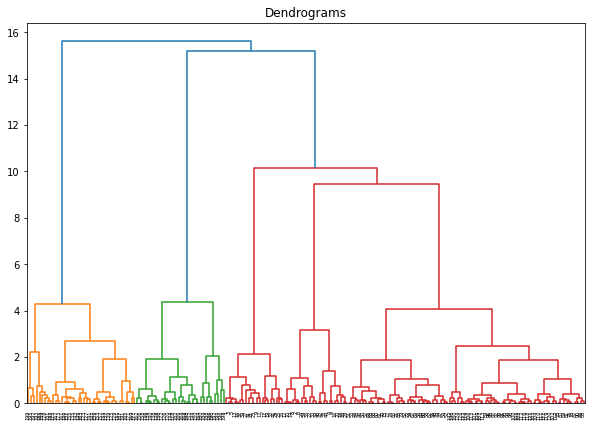

In [14]:
#Plot a dentogram using method='ward' 
from scipy.cluster.hierarchy import linkage, dendrogram
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(x, method='ward'))

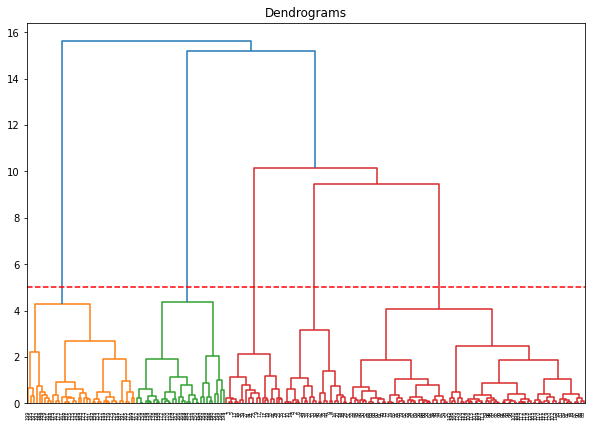

In [15]:
#Plot a dentogram using method='ward' with a horizontal line crossing 5 vertical lines
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(x, method='ward'))
plt.axhline(y=5, color='r', linestyle='--')

### Hierarchical Clustering

#### Build the model

In [16]:
# Build a model using AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
# Make predicts using the model designed and save the predictions to a variable called 'y_hc'
cluster.fit_predict(x)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

In [17]:
# Print 'y_hc'
y_hc=cluster.fit_predict(x)
print(y_hc)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1 2 1 0 1 2 1
 0 1 0 1 0 1 0 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


#### Plot the clusters and label customer types
* _Careful_ - high income but low spenders
* _Standard_ - middle income and middle spenders
* **_Target group_ - middle-to-high income and high spenders (should be targeted by the mall)**
* _Careless_ - low income but high spenders (should be avoided because of possible credit risk)
* _Sensible_ - low income and low spenders

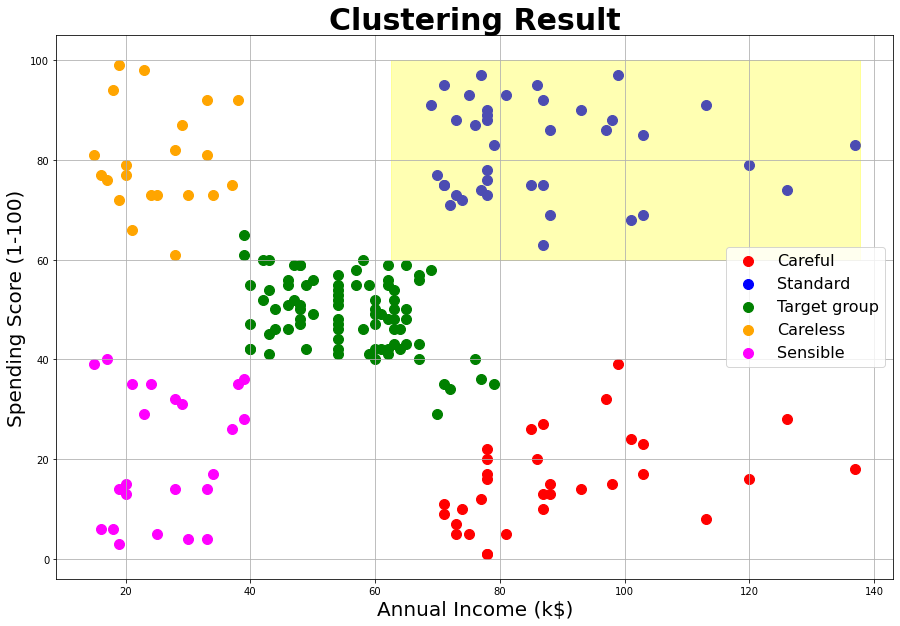

In [18]:
# Plot the cluster using the following code.
plt.figure(figsize=(15,10))
plt.scatter(data[y_hc == 0, 0], data[y_hc == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(data[y_hc == 1, 0], data[y_hc == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(data[y_hc == 2, 0], data[y_hc == 2, 1], s = 100, c = 'green', label = 'Target group')
plt.scatter(data[y_hc == 3, 0], data[y_hc == 3, 1], s = 100, c = 'orange', label = 'Careless')
plt.scatter(data[y_hc == 4, 0], data[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.title('Clustering Result', fontweight='bold',fontsize=30)
plt.xlabel('Annual Income (k$)',fontsize=20)
plt.ylabel('Spending Score (1-100)',fontsize=20)
plt.legend(fontsize=16)
plt.grid(True)
plt.axhspan(ymin=60,ymax=100,xmin=0.4,xmax=0.96,alpha=0.3,color='yellow')
plt.show()

#### Verify the optimal number of clusters by k-means algorithm

C:\Users\pushkals\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


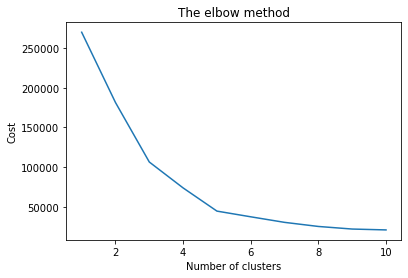

In [19]:
#Using Elbow method find the optimum number of clusters for k-means 
from sklearn.cluster import KMeans
cost = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data)
    cost.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), cost)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Cost') #within cluster sum of squares
plt.show()
